# IFE - Pseudotemporal ordering

## Select cells

In [41]:
seq = loadData_v1(path_input, exp_id, 'seq', 'DataFrame')

In [42]:
len(IFE_cells)

630

In [43]:
#remove cells from basal cluster 0 (Infundibulum)

IFE_cells_sel = list(set(IFE_cells) - set(s_groups_IFE_b[s_groups_IFE_b==0].index))

In [44]:
seq_IFE = seq[IFE_cells_sel]

In [45]:
len(seq_IFE.columns)

536

## Select features


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset

After mean expression cutoff of 0.1, 7354 genes remain

After correlation cutoff of 5, 6989 genes remain

Optimization terminated successfully.
         Current function value: 1471.954626
         Iterations: 24
         Function evaluations: 48

After high variance feature selection, 2500 genes remain

Calculating binary logarithm of x + 1


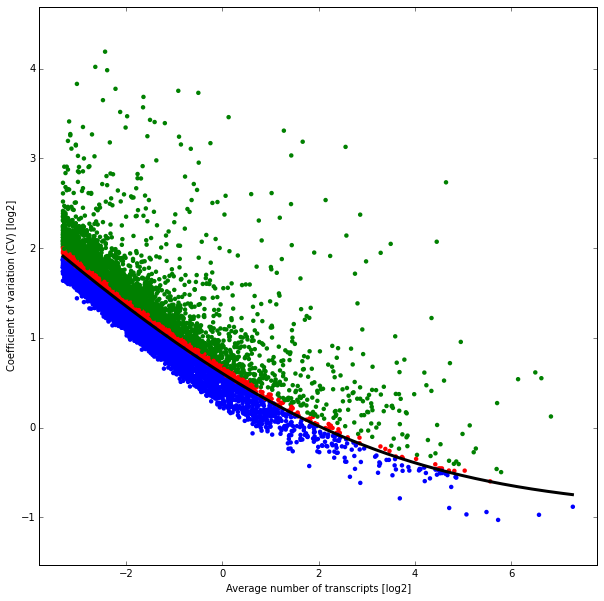

In [46]:
seq_sel_IFE = select_features_v1(seq_IFE, 0.10, 5, 2500, path_input, percentile=95, return_all=False)

## Remove genes which where identified as early immediate genes (#2) and housekeeping genes (#0) in the 1st lvl clustering

In [47]:
genes_sel = list(set(seq_sel_IFE.index.difference(g_groups_1st[g_groups_1st.isin([2,0])].index)))

seq_sel_IFE = log2Transform(seq_IFE.ix[genes_sel])


Calculating binary logarithm of x + 1


In [48]:
len(seq_sel_IFE.index)

2260

## Checkpoint

In [49]:
#saveData_v1(seq_sel_IFE, path_output, exp_id, 'seq_sel_IFE')

In [50]:
seq_sel_IFE = loadData_v1(path_output, exp_id, 'seq_sel_IFE', 'DataFrame')

## Get t-SNE representation of IFE data

In [51]:
dist_mat_tsne_IFE = 1 - seq_sel_IFE.corr()

In [90]:
"""
tsne_coords_IFE = find_tSNE_v1P(dist_mat_tsne_IFE, s_groups_1st, 60, dview, perplexity=25, early_exaggeration=2.0, learning_rate=1000.0, 
                            n_iter=1000, init='random', verbose=0, random_state=None)
"""

"\ntsne_coords_IFE = find_tSNE_v1P(dist_mat_tsne_IFE, s_groups_1st, 60, dview, perplexity=25, early_exaggeration=2.0, learning_rate=1000.0, \n                            n_iter=1000, init='random', verbose=0, random_state=None)\n"

In [72]:
tsne_IFE = tsne_coords_IFE[42]

In [73]:
dist_mat_tsne = pairwise_distance_2d(tsne_IFE)


Creating MST

Diameter path between 1772067075-C08 and 1772067075-A05 with lenght 132

Creating PQ-Tree

Finding permutations

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124

Returning coordinates



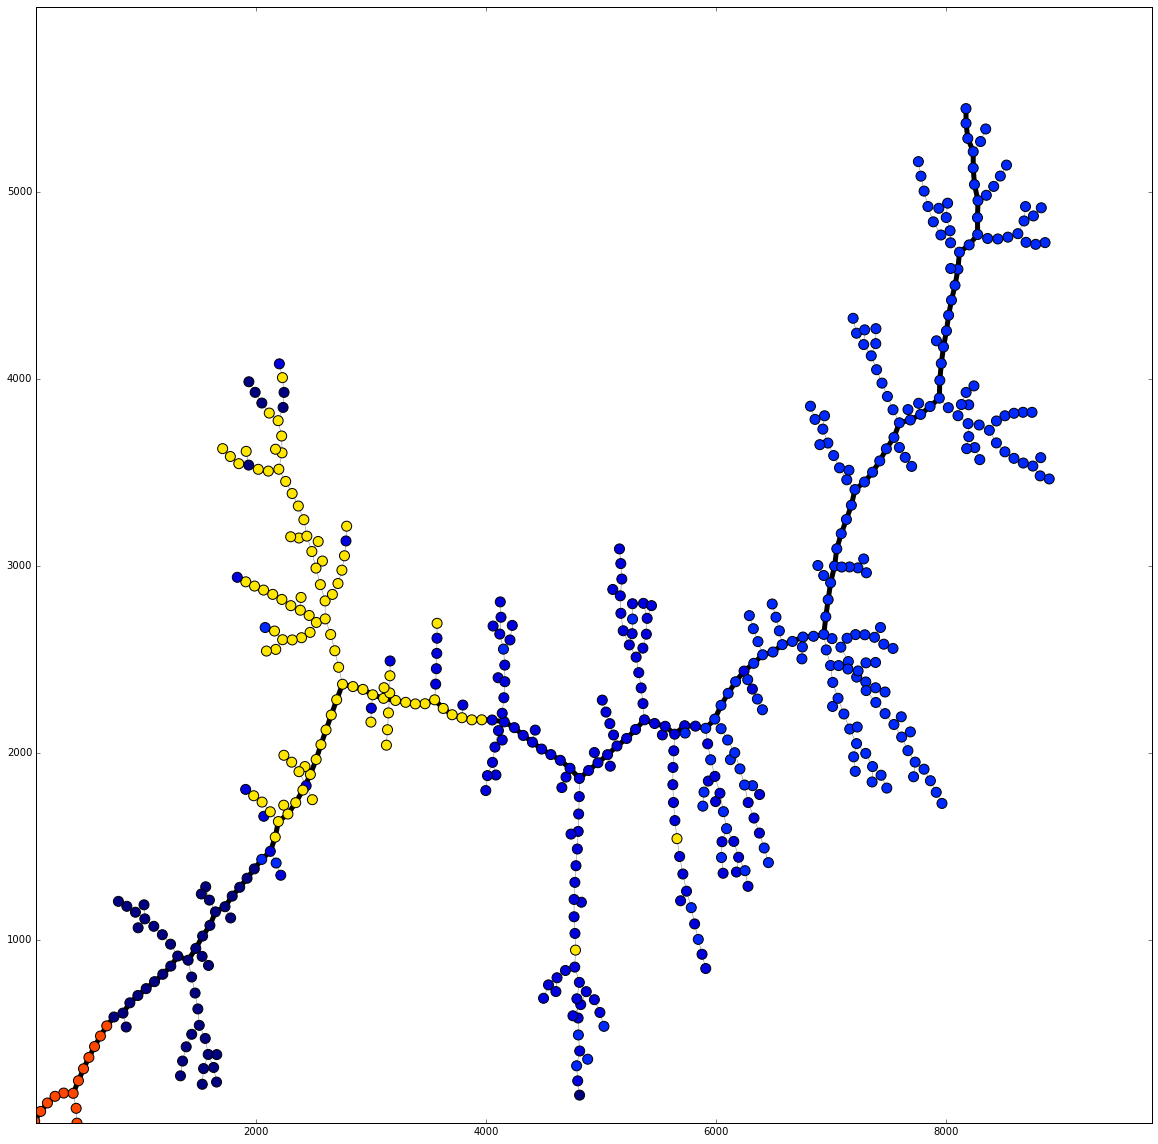

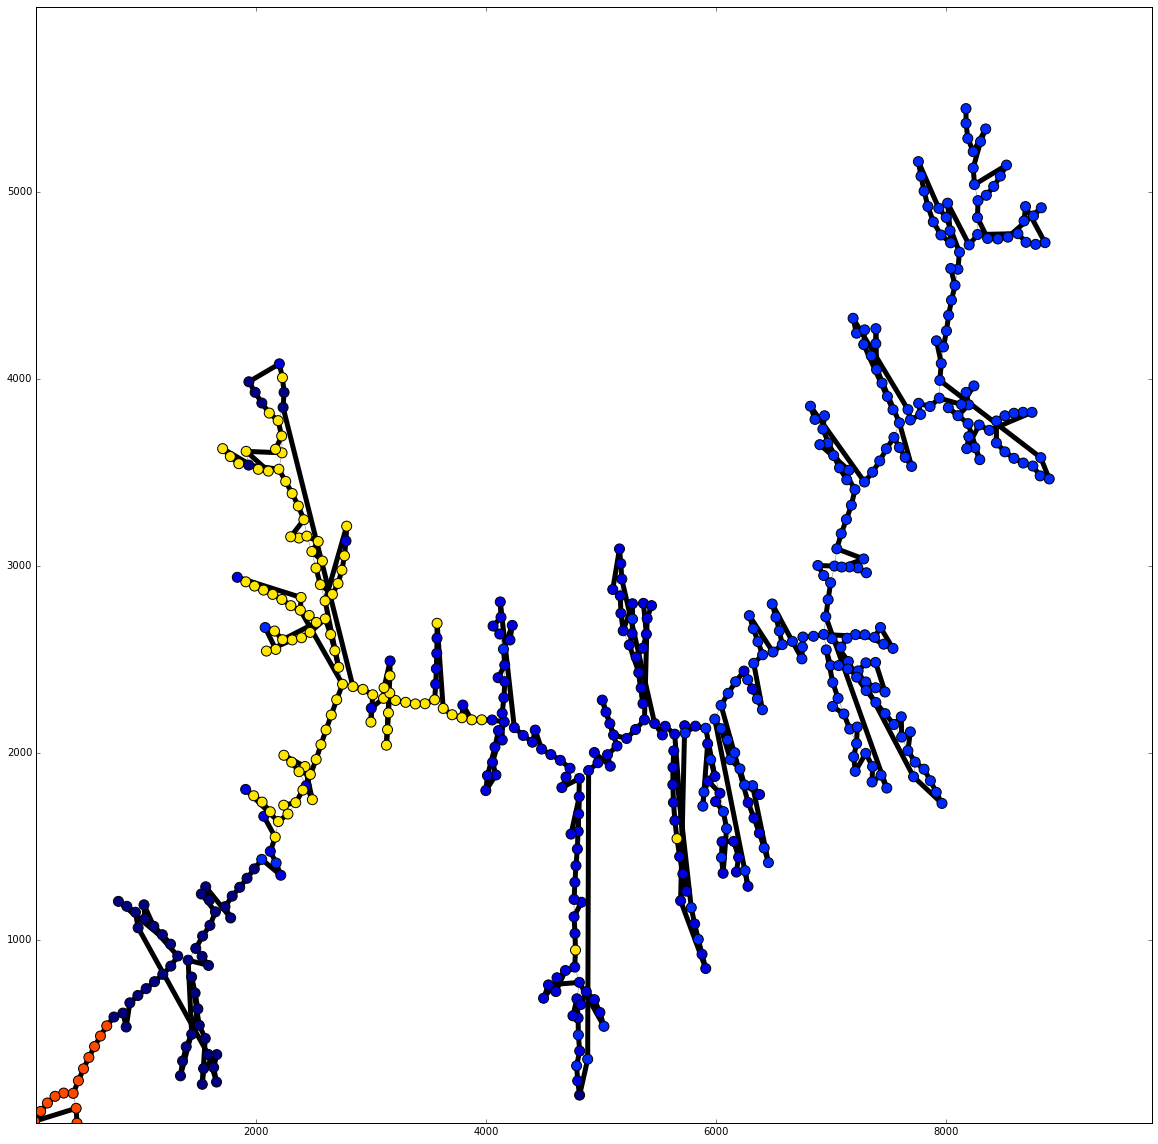

In [74]:
PTO_coords_IFE = PTO_create_pseudotemporal_ordering_2d(dist_mat_tsne, s_groups_1st)


Calculating binary logarithm of x + 1


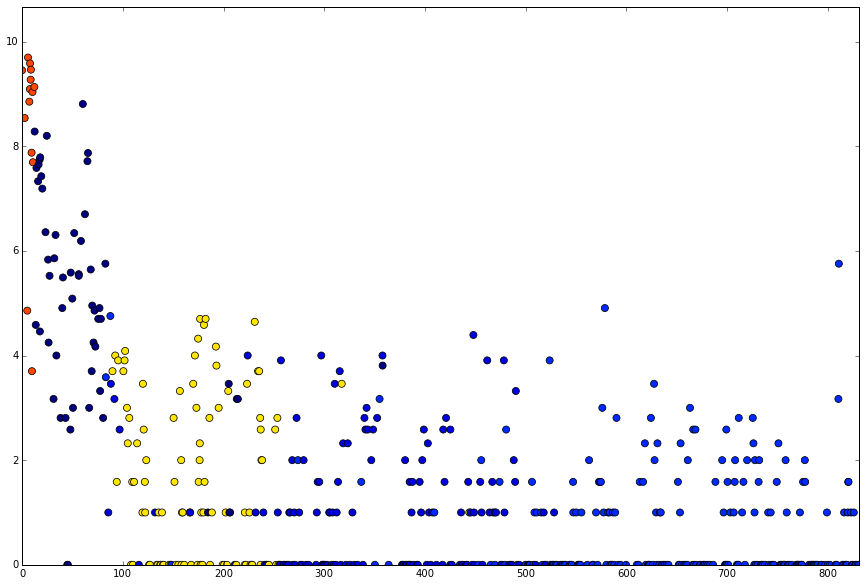

In [78]:
PTO_plot_gene(log2Transform(seq), PTO_coords_IFE, s_groups_1st, 'Lor')

In [86]:
#reverse

PTO_coords_IFE = np.abs(PTO_coords_IFE - PTO_coords_IFE.max()).order()

## Checkpoint

In [88]:
saveData_v1(PTO_coords_IFE, path_output, exp_id, 'PTO_coords_IFE')
saveData_v1(tsne_IFE, path_output, exp_id, 'tsne_IFE')

In [89]:
PTO_coords_IFE = loadData_v1(path_output, exp_id, 'PTO_coords_IFE', 'Series')

## Comparison with data from points in multidimensional space


Creating MST

Diameter path between 1772067055-E09 and 1772067075-C08 with lenght 33

Creating PQ-Tree

Finding permutations

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28

Returning coordinates



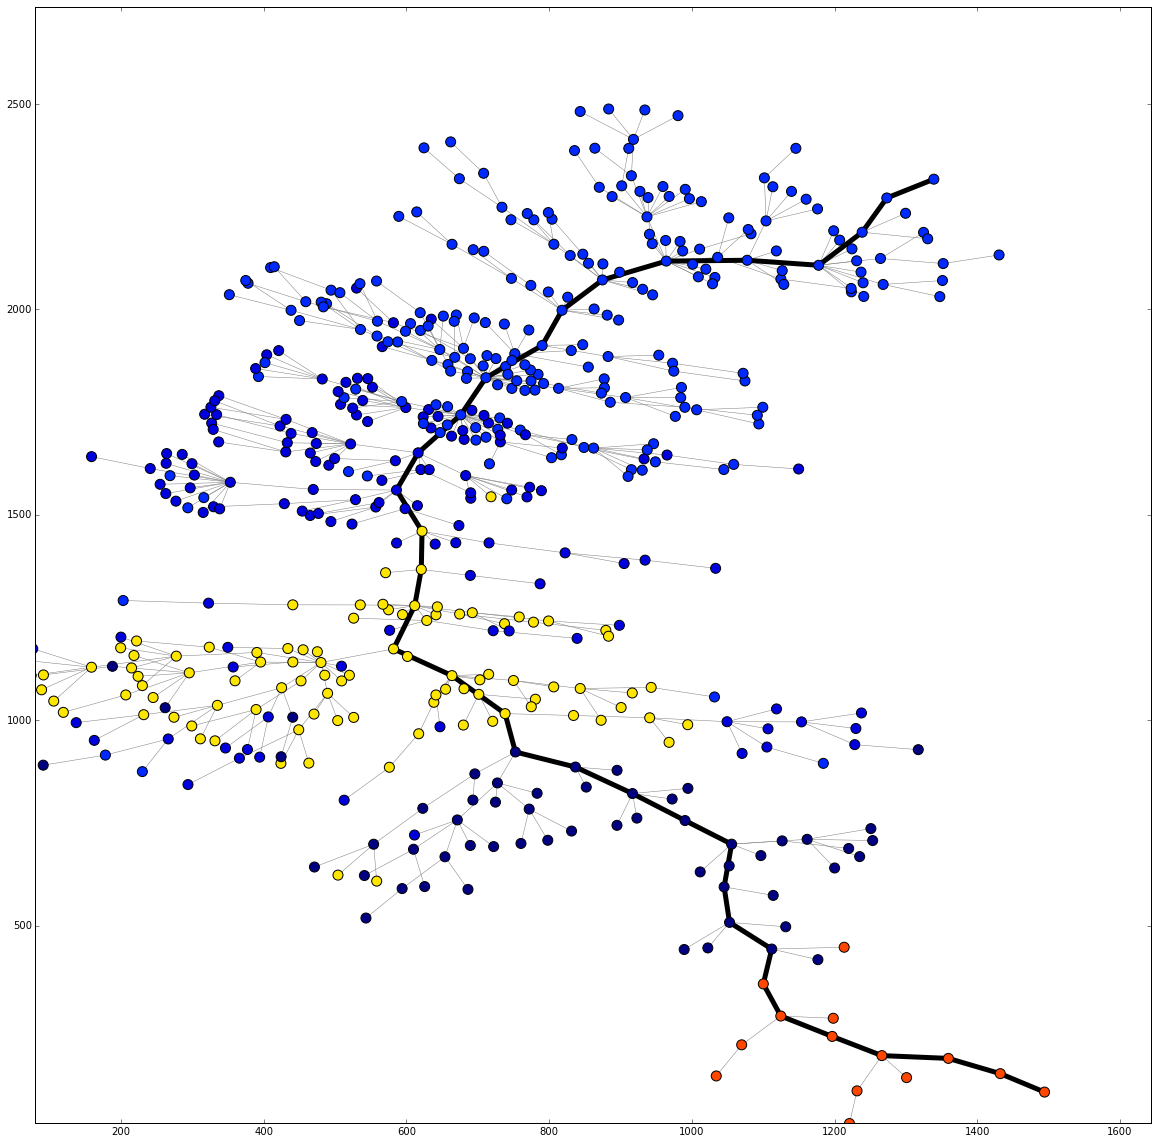

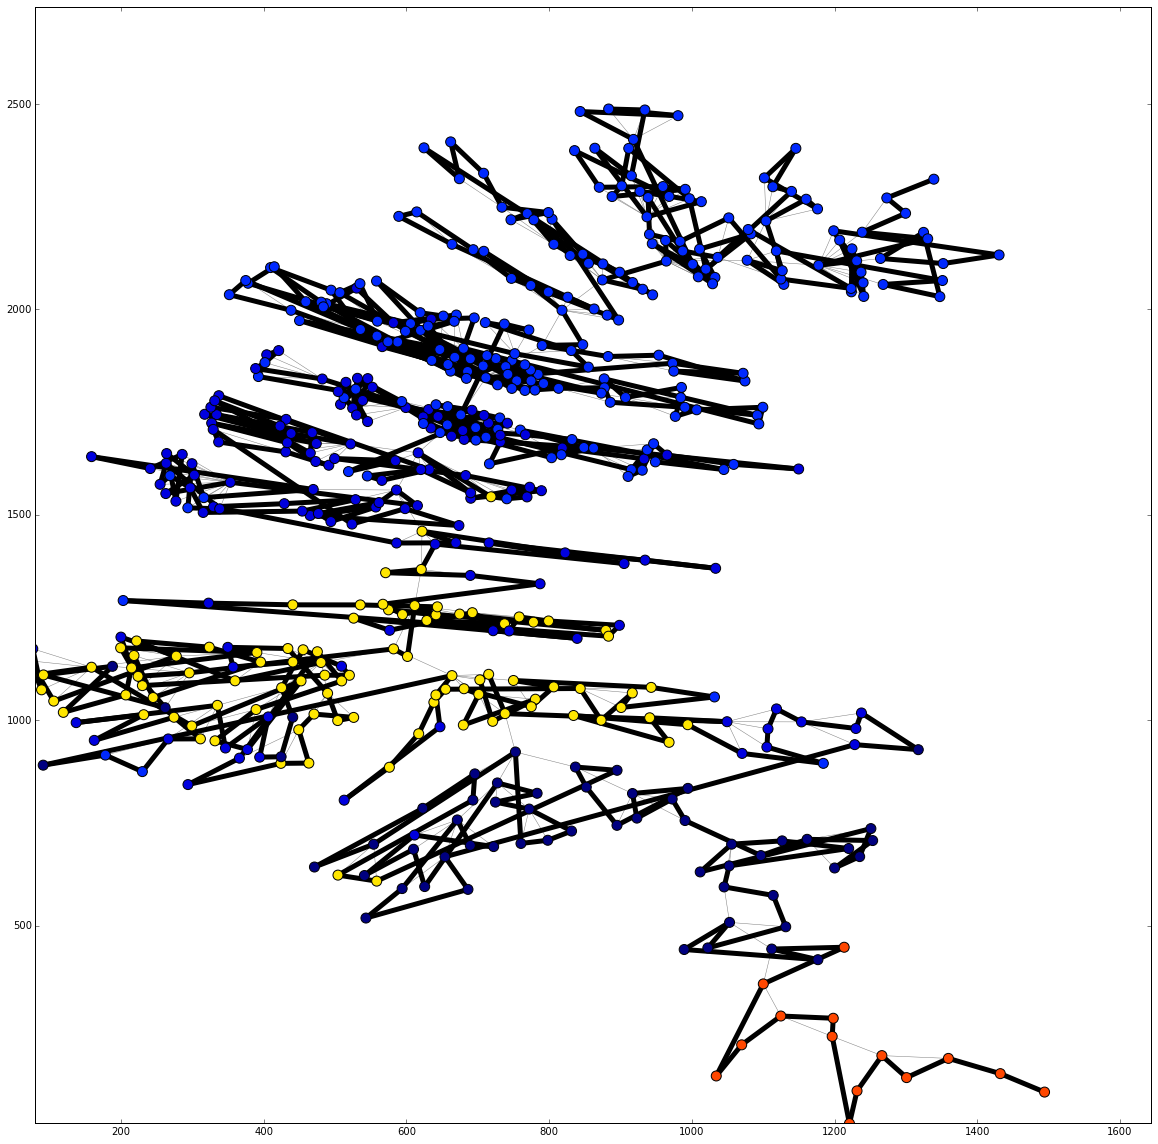

In [79]:
PTO_coords_IFE_multi = PTO_create_pseudotemporal_ordering(seq_sel_IFE, s_groups_1st)

## Checkpoint

In [91]:
saveData_v1(PTO_coords_IFE_multi, path_output, exp_id, 'PTO_coords_IFE_multi')

In [92]:
PTO_coords_IFE_multi = loadData_v1(path_output, exp_id, 'PTO_coords_IFE_multi', 'Series')

## Robustness of pseudotemporal ordering

In [93]:
PTO_coords_IFE_tSNE_it = PTO_robustness_tsne(seq_sel_IFE, 100, dview, 'tSNE_iterations', perplexity=25.0)

In [94]:
PTO_coords_IFE_tSNE_res = PTO_robustness_tsne(seq_sel_IFE, 100, dview, 'tSNE_resampling', perplexity=25.0, resampling=0.25)

In [95]:
PTO_coords_IFE_tSNE_shf = PTO_robustness_tsne(seq_sel_IFE, 100, dview, 'tSNE_shuffling', perplexity=25.0)

## Checkpoint

In [96]:
saveData_v1(PTO_coords_IFE_tSNE_it, path_output, exp_id, 'PTO_coords_IFE_tSNE_it')
saveData_v1(PTO_coords_IFE_tSNE_res, path_output, exp_id, 'PTO_coords_IFE_tSNE_res')
saveData_v1(PTO_coords_IFE_tSNE_shf, path_output, exp_id, 'PTO_coords_IFE_tSNE_shf')

## Cubic spline fitting

In [97]:
seq_IFE = dropNull(seq[seq_sel_IFE.columns], path_input, cutoff_mean=0.10)


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset


In [98]:
len(seq_IFE.index)

7354

In [99]:
IFE_fitted, IFE_stats = fit_vgam(seq_IFE, PTO_coords_IFE, list(seq_IFE.index), 5)

## Checkpoint

In [100]:
#saveData_v1(IFE_fitted, path_output, exp_id, 'IFE_fitted')
#saveData_v1(IFE_stats, path_output, exp_id, 'IFE_stats')

In [52]:
IFE_fitted = loadData_v1(path_output, exp_id, 'IFE_fitted', 'DataFrame')
IFE_stats = loadData_v1(path_output, exp_id, 'IFE_stats', 'DataFrame')

## Select pseudotime-dependent genes (cutoff p-value: 0.001; Bonferroni corrected)

In [53]:
bonferroni = 0.001 / len(IFE_stats.index)

In [54]:
print bonferroni

1.3598041882e-07


In [55]:
genes_PTO_IFE = IFE_stats['Pr(>Chisq)'][IFE_stats['Pr(>Chisq)'] < bonferroni].index

In [56]:
len(genes_PTO_IFE)

1627

## Cluster fitted pseudotime-dependent genes

In [1927]:
#log2 transform splines

IFE_fitted_log2 = log2Transform(IFE_fitted)


Calculating binary logarithm of x + 1


In [1928]:
IFE_fitted_log2_sel = IFE_fitted_log2.ix[genes_PTO_IFE]

In [1929]:
len(IFE_fitted_log2_sel.index)

1627

In [1984]:
preference = np.arange(-8.0, -5.0, 0.1)
damping = np.arange(0.55, 1.0, 0.05)

In [1985]:
affy_g_IFE = IFE_fitted_log2_sel.T.corr()
dist_g_IFE = 1 - affy_g_IFE

(          -8.0      -7.9      -7.8      -7.7      -7.6      -7.5      -7.4  \
 0.55 -426.8401 -521.5151 -438.1659 -396.8503 -463.4111 -433.1891 -423.5412   
 0.60 -447.9401 -430.8124 -432.7278  -521.679 -484.9936 -450.5879 -435.1391   
 0.65 -408.0398 -451.1865 -424.9159 -555.6251 -525.1548 -463.8761 -500.2878   
 0.70 -488.9901 -488.9901 -434.1108  -458.924 -517.2247 -420.9242  -514.611   
 0.75 -485.0788 -442.5093 -436.9367 -439.6648 -439.7857 -435.4073 -415.1129   
 0.80 -437.6611 -434.8333 -428.5491 -436.5433 -436.5433 -436.5433 -429.4787   
 0.85 -445.5786 -479.3135 -449.0346 -449.0346 -449.0346 -480.8838 -473.8707   
 0.90 -432.8001 -432.8001 -415.2574 -415.2574 -429.4845 -422.5351 -422.5351   
 0.95  -418.264  -418.264  -418.264  -418.264  -418.264  -418.264  -418.264   
 
           -7.3      -7.2      -7.1    ...         -6.0      -5.9      -5.8  \
 0.55 -457.3437 -511.9216 -437.5742    ...    -540.2603 -499.6777 -428.8305   
 0.60 -436.6162 -423.9865 -477.0462    ...    -527

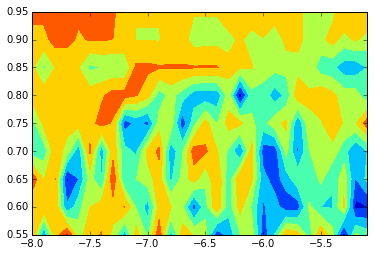

In [1986]:
IC_g, Ng_g = AP_IC_v3P(IFE_fitted_log2_sel, affy_g_IFE, 1, 'precomputed', preference, damping, path_scripts, dview, linkage='single', criterion='BIC')
IC_g, Ng_g, plt.contourf(IC_g.columns, IC_g.index, IC_g)

In [1988]:
pref_g, damp_g = AP_IC_findmin(IC_g)
print pref_g, damp_g

-6.2 0.8


In [1989]:
g_groups_IFE = AP_clustering_v3P(IFE_fitted_log2_sel, affy_g_IFE, 1, 'precomputed', pref_g, damp_g, path_scripts, linkage = 'single')

In [1990]:
len(set(g_groups_IFE))

8

In [1995]:
g_groups_IFE = AP_groups_reorder(g_groups_IFE, [1,5,0,2,3,7,4,6])

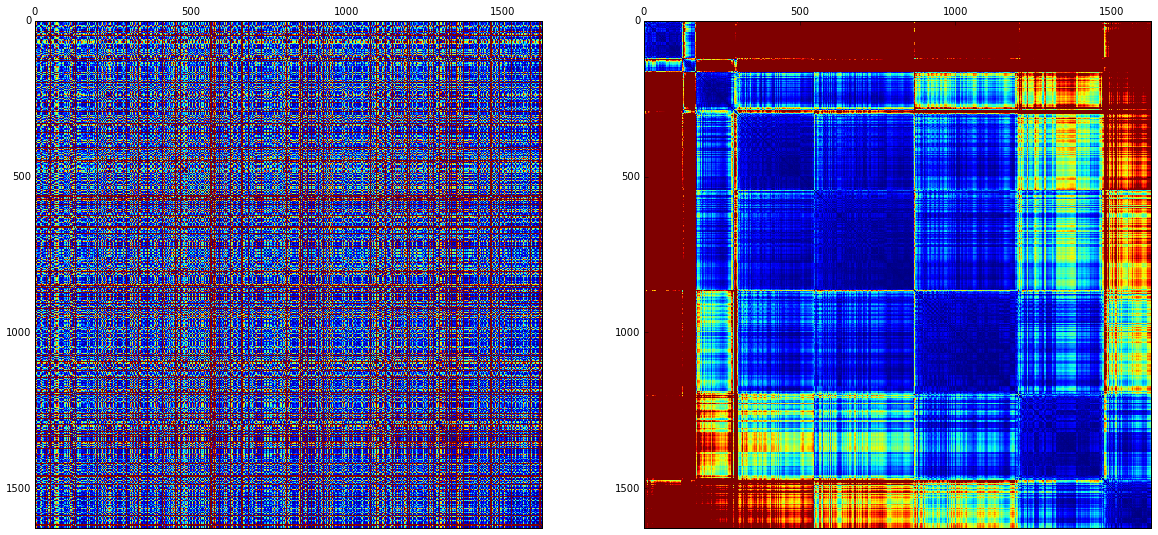

In [1996]:
draw_AP_dist_mat(dist_g_IFE, g_groups_IFE)

## Checkpoint

In [1997]:
saveData_v1(g_groups_IFE, path_output, exp_id, 'g_groups_IFE')

In [1998]:
g_groups_IFE = loadData_v1(path_output, exp_id, 'g_groups_IFE', 'Series')

## Correlate all cells to pseudotime

In [119]:
IFE_corr = PTO_correlate(log2Transform(seq), log2Transform(IFE_fitted), s_groups_1st.index, genes_PTO_IFE, return_p=False)


Calculating binary logarithm of x + 1

Calculating binary logarithm of x + 1


In [120]:
IFE_corr_max = PTO_correlate_find_max(IFE_corr)

## Checkpoint

In [121]:
saveData_v1(IFE_corr, path_output, exp_id, 'IFE_corr')
saveData_v1(IFE_corr_max, path_output, exp_id, 'IFE_corr_max')

In [63]:
IFE_corr_max = loadData_v1(path_output, exp_id, 'IFE_corr_max', 'Series')

## Evaluate robustness of correlation

In [51]:
def PTO_correlation_robustness_v1P(dataset, PTO_fitted, cells, genes, dview, iterations, resampling=0.5):
    
    """
    Calculates the robustness of the correlation of a cell to a spatial or temporal signature by
    randomly removing part of the signature.
    ----------
    dataset: [pd.DataFrame] of m cells x n genes.
    PTO_fitted: [pd.DataFrame] containing the cubic splines over the range of the fitted axis.
    cells: [list] of cell ID to be considered.
    genes: [list] of genes to be considered.
    iterations: number [int] of interations.
    resampling: fraction of genes used. Default = 0.5.
    ----------
    returns [pd.DataFrame] containing positions for all specified cells over all iterations.
    """
    
    ##########################################################
    
    def PTO_correlation_robustness_helper(dataset, PTO_fitted, cells, genes):
        
        #define dataset
    
        dataset = dataset.ix[genes, cells]
        PTO_fitted = PTO_fitted.ix[genes]
    
        #define output

        corr_r = pd.DataFrame(index = cells, columns = PTO_fitted.columns)

        for m in cells:

            x_tmp = dataset[m]

            for p in PTO_fitted.columns:

                y_tmp = PTO_fitted[p]

                corr_tmp = scipy.stats.pearsonr(x_tmp, y_tmp)

                corr_r.ix[m, p] = corr_tmp[0]
                
        #find position with maximum correlation
                
        corr_max = pd.Series(index = corr_r.index)
    
        for ix in corr_r.index:
    
            corr_max[ix] = float(corr_r.ix[ix].order().index[-1])
    
        return corr_max
        
    ##########################################################
    
    it = iterations
    n_genes = int(len(genes) * resampling)
    
    #define output
    
    output = pd.DataFrame(index = range(iterations), columns = cells)
    
    #perform test against baseline in parallel
    
    output_tmp = dview.map_sync(PTO_correlation_robustness_helper,
                                [dataset] * it,
                                [PTO_fitted] * it,
                                [cells] * it,
                                [np.random.choice(genes, n_genes, replace = False) for i in range(it)])
    
    #fuse data and return
    
    for pos, tmp in enumerate(output_tmp):
        
        output.ix[pos] = tmp
    
    return output 

In [62]:
IFE_corr_robustness = PTO_correlation_robustness_v1P(log2Transform(seq), 
                                                     log2Transform(IFE_fitted), 
                                                     s_groups_1st.index, 
                                                     genes_PTO_IFE, 
                                                     dview, 100, resampling=0.25)


Calculating binary logarithm of x + 1

Calculating binary logarithm of x + 1


In [64]:
IFE_corr_robustness_distance = PTO_correlation_robustness_distance(IFE_corr_max, IFE_corr_robustness)

## Checkpoint

In [67]:
saveData_v1(IFE_corr_robustness, path_output, exp_id, 'IFE_corr_robustness')
saveData_v1(IFE_corr_robustness_distance, path_output, exp_id, 'IFE_corr_robustness_distance')

## Control: order uHF cells

In [259]:
seq = loadData_v1(path_input, exp_id, 'seq', 'DataFrame')

In [260]:
uHF_cells_sel = s_groups_2nd[s_groups_2nd.isin([10,11,12,13])].index

In [261]:
len(uHF_cells_sel)

250

In [262]:
seq_uHF_diff = seq[uHF_cells_sel]

## Select features


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset

After mean expression cutoff of 0.1, 7237 genes remain

After correlation cutoff of 5, 6404 genes remain

Optimization terminated successfully.
         Current function value: 1327.901773
         Iterations: 33
         Function evaluations: 64

After high variance feature selection, 2500 genes remain

Calculating binary logarithm of x + 1


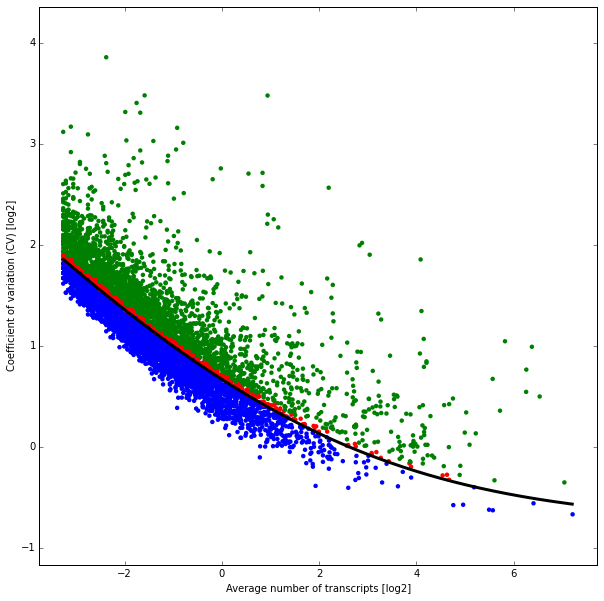

In [263]:
seq_sel_uHF_diff = select_features_v1(seq_uHF_diff, 0.10, 5, 2500, path_input, percentile=95, return_all=False)

## Remove genes which where identified as early immediate genes (#2) and housekeeping genes (#0) in the 1st lvl clustering

In [264]:
genes_sel = list(set(seq_sel_uHF_diff.index.difference(g_groups_1st[g_groups_1st.isin([2,0])].index)))

seq_sel_uHF_diff = log2Transform(seq_uHF_diff.ix[genes_sel])


Calculating binary logarithm of x + 1


In [265]:
len(seq_sel_uHF_diff.index)

2266

## Checkpoint

In [106]:
saveData_v1(seq_sel_uHF_diff, path_output, exp_id, 'seq_sel_uHF_diff')

In [196]:
seq_sel_uHF_diff = loadData_v1(path_output, exp_id, 'seq_sel_uHF_diff', 'DataFrame')

## Get t-SNE representation of IFE data

In [255]:
dist_mat_tsne_uHF_diff = dist_mat_dim_reduc(seq_sel_uHF_diff, 5)

In [266]:
"""
tsne_coords_uHF_diff = find_tSNE_v1P(dist_mat_tsne_uHF_diff, s_groups_2nd, 60, dview, perplexity=100, early_exaggeration=2.0, learning_rate=1000.0, 
                            n_iter=1000, init='random', verbose=0, random_state=None)
"""

"\ntsne_coords_uHF_diff = find_tSNE_v1P(dist_mat_tsne_uHF_diff, s_groups_2nd, 60, dview, perplexity=100, early_exaggeration=2.0, learning_rate=1000.0, \n                            n_iter=1000, init='random', verbose=0, random_state=None)\n"

In [191]:
tsne_uHF_diff = tsne_coords_uHF_diff[22]

In [192]:
dist_mat_tsne = pairwise_distance_2d(tsne_uHF_diff)


Creating MST

Diameter path between 1772067085-E01 and 1772067085-B04 with lenght 60

Creating PQ-Tree

Finding permutations

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50

Returning coordinates



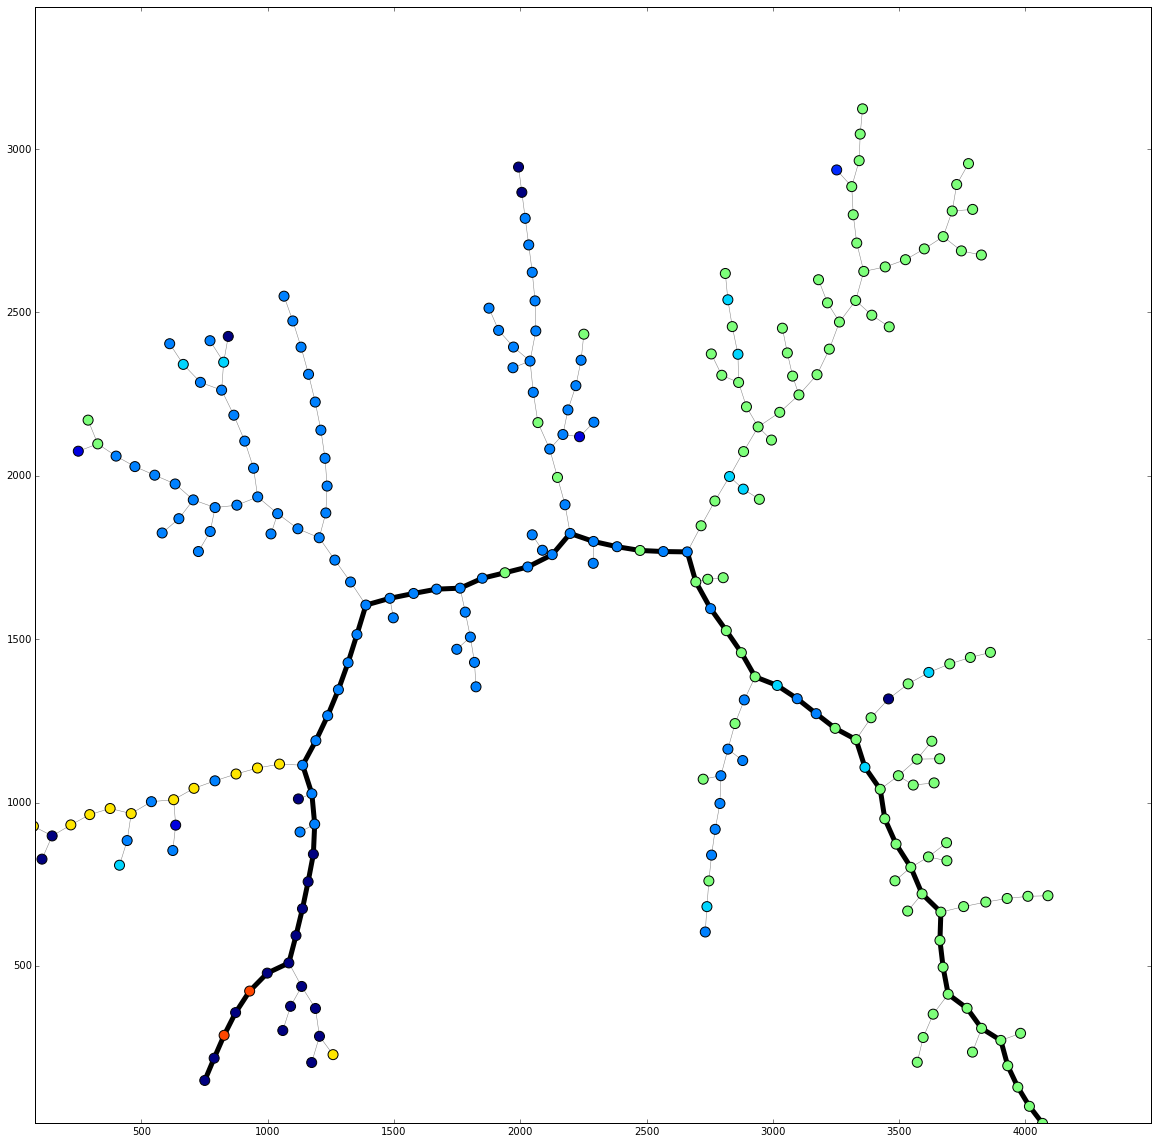

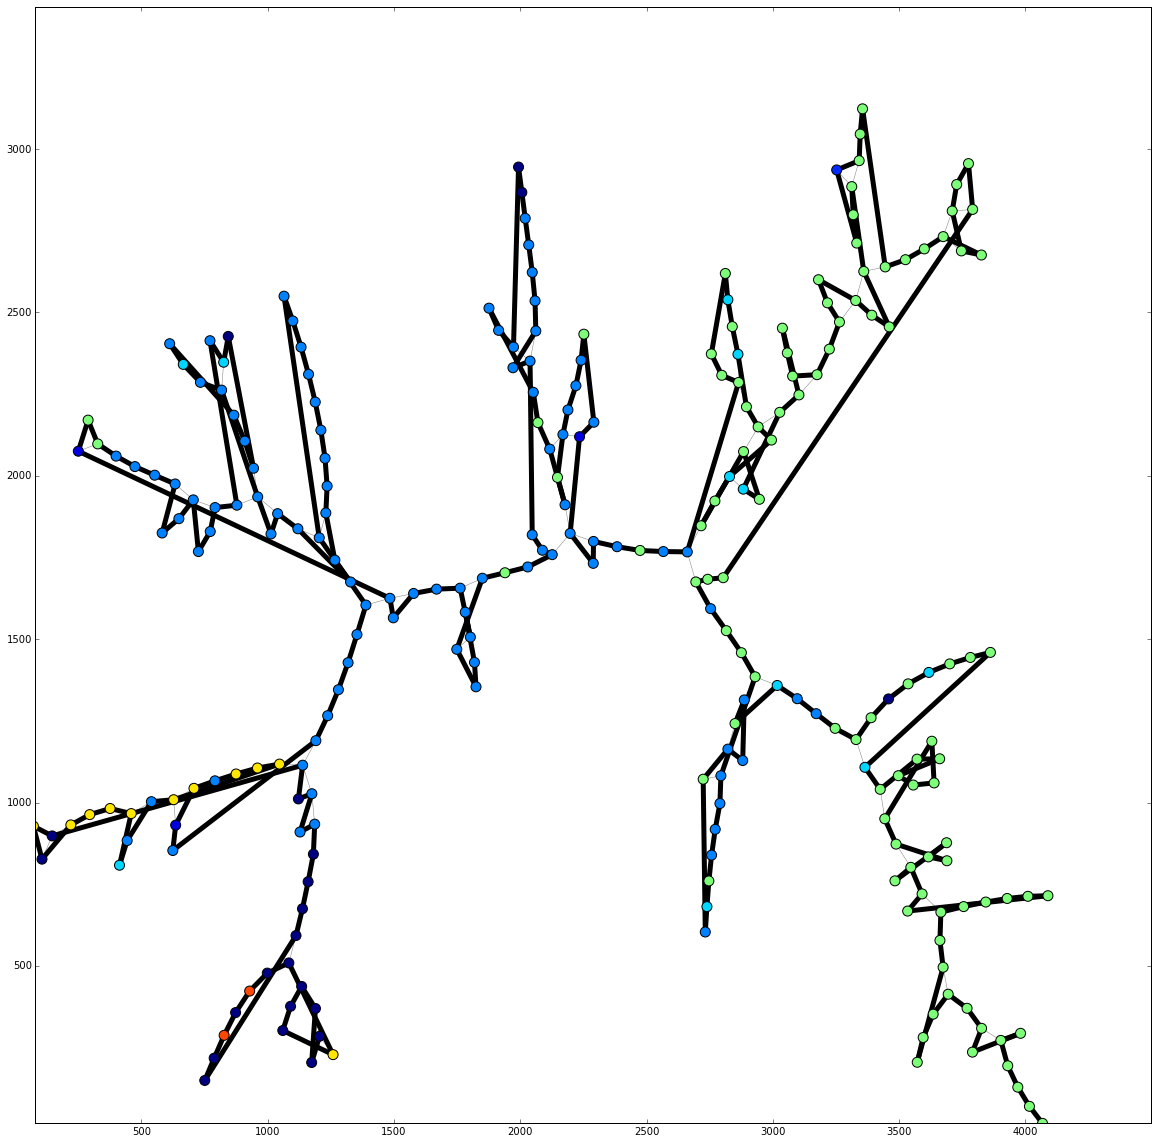

In [193]:
PTO_coords_uHF = PTO_create_pseudotemporal_ordering_2d(dist_mat_tsne, s_groups_1st)

In [205]:
#inverse

PTO_coords_uHF = np.abs(PTO_coords_uHF - PTO_coords_uHF.max()).order()

## Checkpoint

In [206]:
saveData_v1(PTO_coords_uHF, path_output, exp_id, 'PTO_coords_uHF')

In [207]:
PTO_coords_uHF = loadData_v1(path_output, exp_id, 'PTO_coords_uHF', 'Series')

## Cubic spline fitting

In [209]:
uHF_fitted, uHF_stats = fit_vgam(seq, PTO_coords_uHF, list(IFE_fitted.index), 5)

## Checkpoint

In [210]:
#saveData_v1(uHF_fitted, path_output, exp_id, 'uHF_fitted')
#saveData_v1(uHF_stats, path_output, exp_id, 'uHF_stats')

In [211]:
uHF_fitted = loadData_v1(path_output, exp_id, 'uHF_fitted', 'DataFrame')
uHF_stats = loadData_v1(path_output, exp_id, 'uHF_stats', 'DataFrame')

## Select pseudotime-dependent genes (cutoff p-value: 0.001; Bonferroni corrected)¶

In [212]:
bonferroni = 0.001 / len(uHF_stats.index)

In [213]:
print bonferroni

1.3598041882e-07


In [214]:
genes_PTO_uHF = uHF_stats['Pr(>Chisq)'][uHF_stats['Pr(>Chisq)'] < bonferroni].index

In [215]:
len(genes_PTO_uHF)

1068

## Correlate all cells to uHF pseudotime¶

In [216]:
uHF_corr = PTO_correlate(log2Transform(seq), log2Transform(uHF_fitted), s_groups_1st.index, genes_PTO_uHF, return_p=False)


Calculating binary logarithm of x + 1

Calculating binary logarithm of x + 1


In [217]:
uHF_corr_max = PTO_correlate_find_max(uHF_corr)

## Checkpoint

In [219]:
#saveData_v1(uHF_corr, path_output, exp_id, 'uHF_corr')
#saveData_v1(uHF_corr_max, path_output, exp_id, 'uHF_corr_max')